# Intro to Data Science: Final Project

<h3> Derek Lilienthal </h3>

## Introduction

In this project, i am given a data set that is a mixture of a few other data sets with added noise throughout some of the observations. The purpose of this project is to explain and demonstrate all the techniques i've learned over the semester. Because all of the variables are autonomized, the first thing i had to do was explore what kind of data i have by doing some summary statistics, a couple series of graphs, and looking at the value counts of each column to see if there is anything noticeably un-ordinary. Afterward, i do some pre-processing to the data set which include: removing missing data, removing bad data, combining similar features, and creating new categorical variables from the combined features. After cleaning the data set, i then produced some visuals to get a better idea on the relationships certain features have with each other. Then finally, i implement a couple different machine learning algorithms like Linear Regression, Polynomial Regression, kNN Classification, and K-Means clustering. 

We begin by importing packages we will need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(color_codes=True)
sns.set(font_scale=2)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read the data

In [2]:
df = pd.read_csv("Derek.csv")

## Initial data exploration

First, i will look at how many columns we have and what kind of data type they are. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15217 entries, 0 to 15216
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      14556 non-null  object 
 1   x1      14965 non-null  float64
 2   x2      15217 non-null  object 
 3   y       15096 non-null  float64
 4   x3      15217 non-null  float64
 5   x4      15217 non-null  float64
dtypes: float64(4), object(2)
memory usage: 713.4+ KB


I have 6 columns, 2 are objects and 4 are floating points

Below is a snap shot of the top 5 rows in the data set

In [4]:
df.head()

,x0,x1,x2,y,x3,x4
0,A0,21.0,A0,0.03,0.02,0.00
1,A1,22.0,A1,2.03,1.56,0.00
2,A2,31.0,A2,0.66,0.12,0.04
3,A2,32.0,A3,0.01,0.00,0.00
4,A3,28.0,A4,0.34,0.01,0.00


Summary statistics of the numeric columns

In [5]:
df.describe()

,x1,y,x3,x4
count,14965.000000,15096.000000,15217.000000,15217.000000
mean,26.418710,0.264495,0.146562,0.078154
std,5.819402,0.829295,0.507507,0.340674
min,0.000000,0.000000,0.000000,-5.774641
25%,23.000000,0.000000,0.000000,0.000000
50%,27.000000,0.080000,0.020000,0.000000
75%,30.000000,0.240000,0.110000,0.040000
max,40.000000,41.490000,29.020000,10.220000


To interpret the table: <br>
<b>x1</b>'s average value is 26.4 but its standard deviation is 5.8. 50% of the data is contained in-between the values of 23 and 30 but the maximum value within the column is 40 and the minimum is 0. <br>
<b>y</b>'s average value is 0.2 with a standard deviation of 0.8. 50% of the data is contained in-between the values of 0 and 0.24 and 41.49 is the max value and 0 is the minimum value. <br>
<b>x3</b>'s average value is 0.14 with a standard deviation of 0.5. 50% of the data is contained in-between the values of 0 and 0.1 and the max value is 29 and the min is 0. <br>
<b>x4</b>'s average value is 0.07 with a standard deviation of 0.3. 50% if the data is contained in-between the values of 0 and 0.04 and the max value is 10.22 and the min is -5.7

Basic information about the columns that are not numeric

In [6]:
df.describe(include=['O'])

,x0,x2
count,14556,15217
unique,30,563
top,A0,A1
freq,1935,1232


To interpret the table: <br>
<b>x0</b> has 30 unique items and the most common attribute is A0. <br>
<b>x2</b> has 563 unique items and the most common attribute is A1. <br>

Next, i am going to display how many unique values there are in the data set for each column. 

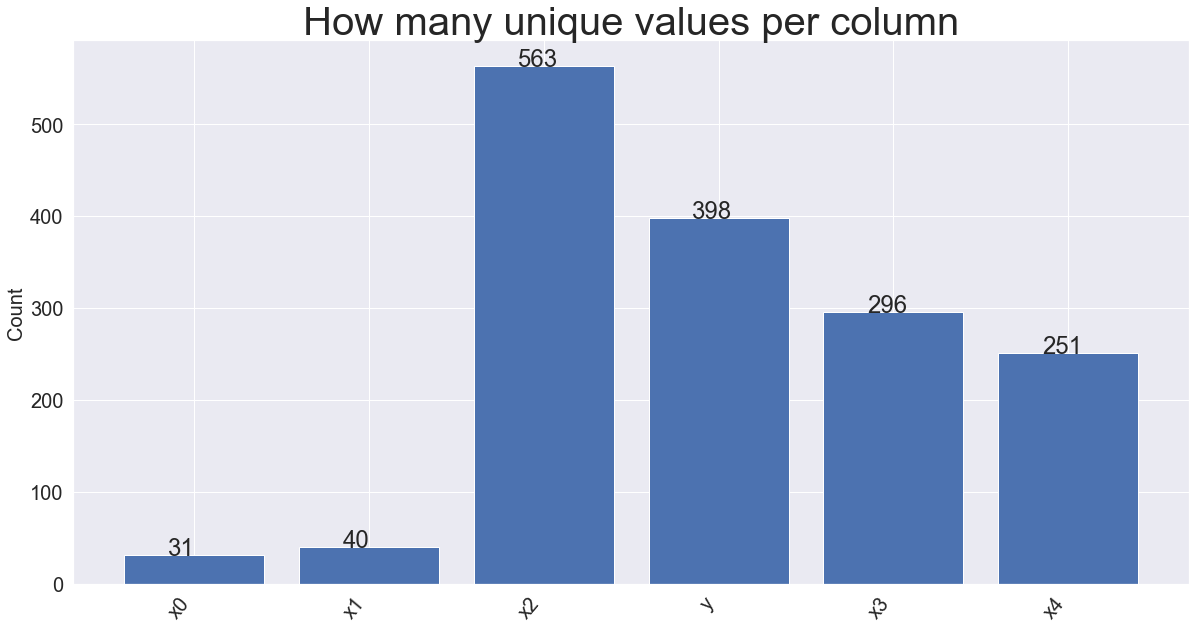

In [7]:
temp_dict = {}
for col in df.columns:
    temp_dict[col] = df[col].unique().size
    
ax = plt.bar(temp_dict.keys(),temp_dict.values())
plt.title('How many unique values per column', fontsize=40)
plt.xticks(fontsize=20, horizontalalignment='right')
plt.yticks(fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=50)
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()+0.25, col.get_height(), list(temp_dict.values())[i]);

From my initial guesses, it seems like x0 and x1 are categorical data because the amount of unique values is relatively low for a data set that has over 15,000 observations. 

Next, i display the percentage and the number of missing data in the entire data set.

In [8]:
pd.DataFrame(df.isna().mean(), index=df.columns, columns=['Percentage Missing']).join(df.isna().sum().to_frame()).rename(columns={0:'Number of Missing'})

,Percentage Missing,Number of Missing
x0,0.043438,661
x1,0.016560,252
x2,0.000000,0
y,0.007952,121
x3,0.000000,0
x4,0.000000,0


Three columns contain missing data. <b> x0, x1, </b> and<b> y </b> all have missing attributes.

The missing data in the data frame that will be address further down in the report. 

<b> Distribution of Data </b> <br>
Next, i am going to be looking at the distribution of data within all the columns in the data set. The purpose of this is to see if there is any outliers that stand out and to see which features are most common within each column. 

Below, i show some box plots of the numeric data in order to better visualize what kind out outliers may be present in the data set.

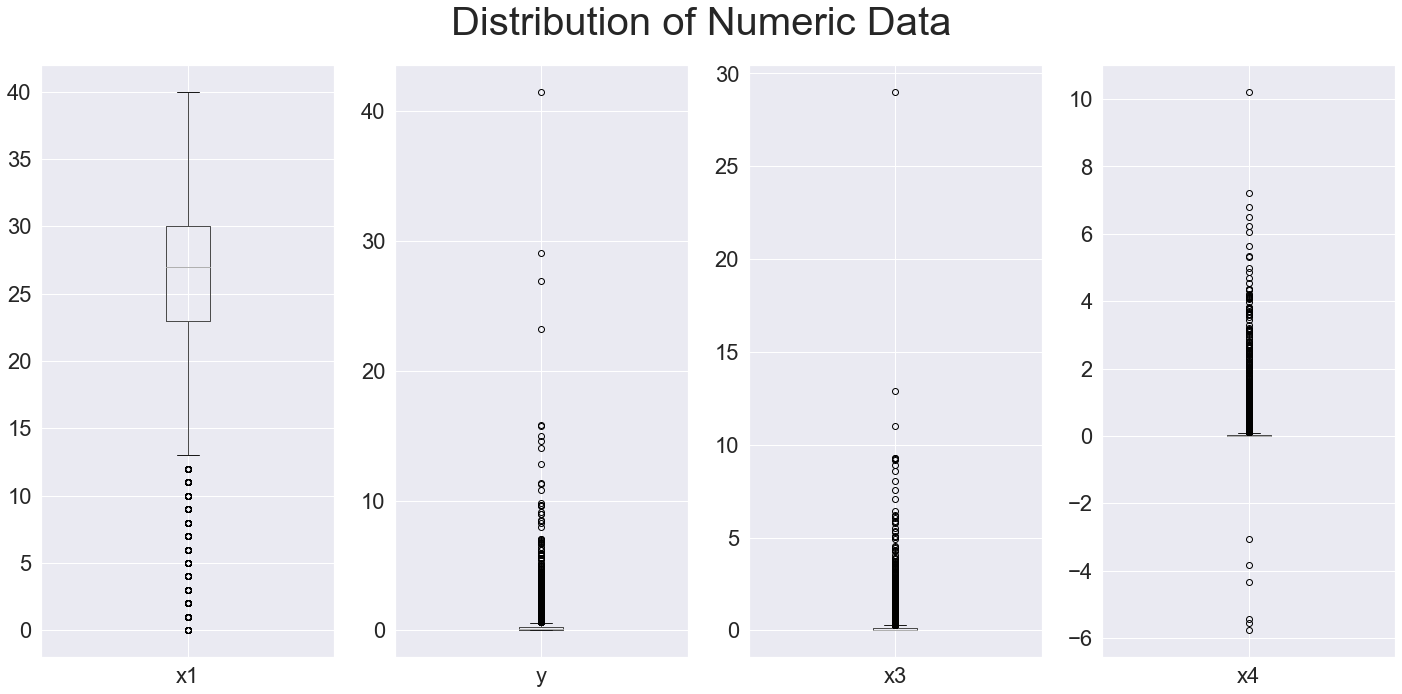

In [9]:
sns.set(font_scale=2)
cat_columns = ['x1','y','x3','x4']
plt.subplots_adjust(wspace=1, hspace=1, right=2)
i = 1
for col in cat_columns:
    plt.subplot(1, len(cat_columns), i)
    df.boxplot([col])
    i += 1
plt.tight_layout()
plt.suptitle('Distribution of Numeric Data', fontsize=40)
plt.subplots_adjust(top=0.9);

Each one of the numeric columns has some significant outliers. The one's i will end up removing though are the negative ones on x4 because there are only a handful of points that are negative compared to the rest being either 0 or all positive. I will not remove any more outliers from any of the other columns because i do not know what they mean so i do not know what kind of positive or negative impact they could lead to. 

Next, i show bar graphs of the distribution of numeric data in the data set.

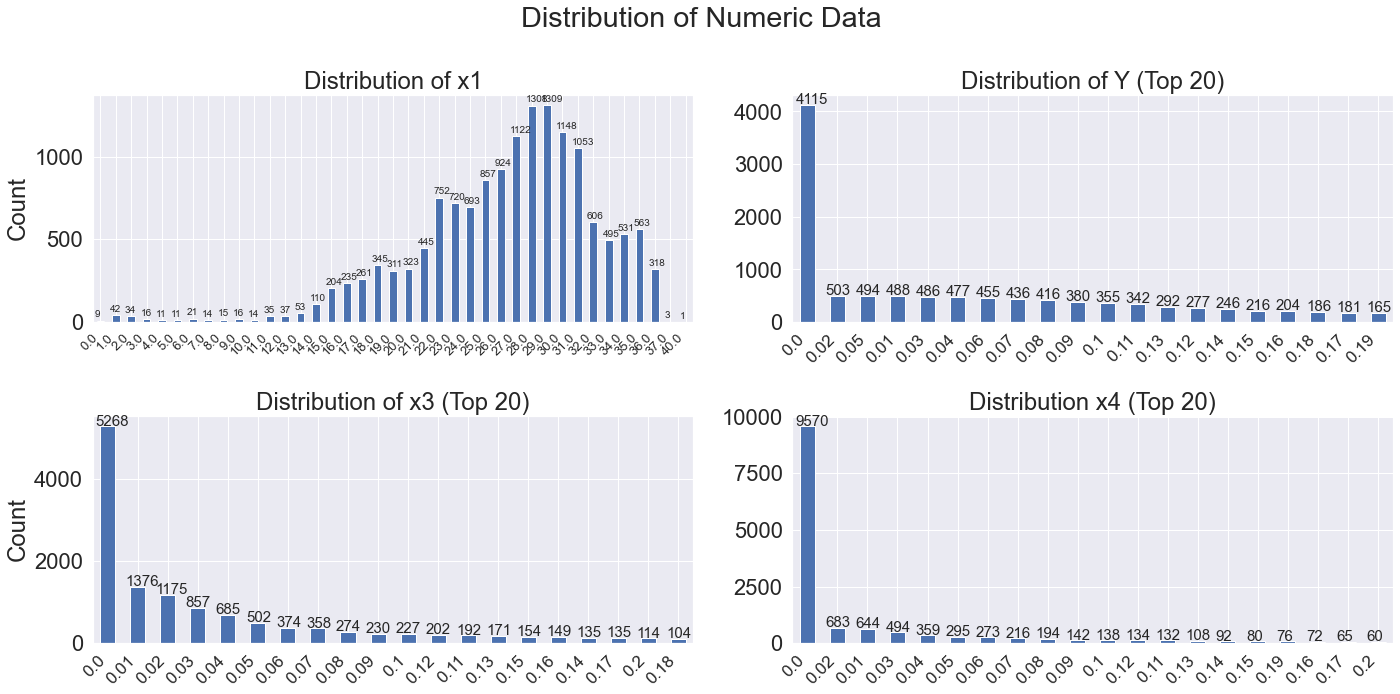

In [10]:
fig, axs = plt.subplots(2, 2, sharex=False, sharey=False)
# Top left
df['x1'].value_counts().sort_index().plot.bar(ax = axs[0,0])
axs[0,0].set_title('Distribution of x1')
axs[0,0].set_ylabel('Count')
plt.sca(axs[0,0])
for i, col in enumerate(axs[0,0].patches):
    plt.text(col.get_x()-.15, col.get_height() + 20, df['x1'].value_counts().sort_index().tolist()[i], fontsize=10)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=45)
plt.xticks(fontsize=13, horizontalalignment='right')
# Top right
df['y'].value_counts().head(20).plot.bar(ax = axs[0,1])
axs[0,1].set_title('Distribution of Y (Top 20)')
plt.sca(axs[0,1])
for i, col in enumerate(axs[0,1].patches):
    plt.text(col.get_x()-.15, col.get_height() + 20, df['y'].value_counts().head(20).tolist()[i], fontsize=15)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=45)
plt.xticks(fontsize=17, horizontalalignment='right')
# Bottom left
df['x3'].value_counts().head(20).plot.bar(ax = axs[1,0])
axs[1,0].set_title('Distribution of x3 (Top 20)')
axs[1,0].set_ylabel('Count')
plt.sca(axs[1,0])
for i, col in enumerate(axs[1,0].patches):
    plt.text(col.get_x()-.15, col.get_height() + 20, df['x3'].value_counts().head(20).tolist()[i], fontsize=15)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=45)
plt.xticks(fontsize=17, horizontalalignment='right')
# Bottom right
df['x4'].value_counts().head(20).plot.bar(ax = axs[1,1])
axs[1,1].set_title('Distribution x4 (Top 20)')
plt.sca(axs[1,1])
for i, col in enumerate(axs[1,1].patches):
    plt.text(col.get_x()-.15, col.get_height() + 20, df['x4'].value_counts().head(20).tolist()[i], fontsize=15)
plt.tick_params(axis='x', which='both', labelsize=20, labelbottom=True, rotation=45)
plt.xticks(fontsize=17, horizontalalignment='right')
plt.suptitle('Distribution of Numeric Data')
plt.tight_layout();

From the graph above, x1 has a left skew within the data and the columns <b> y, x3,</b> and <b> x4 </b> most common attribute is 0.

Below is a distribution of the column x2. 

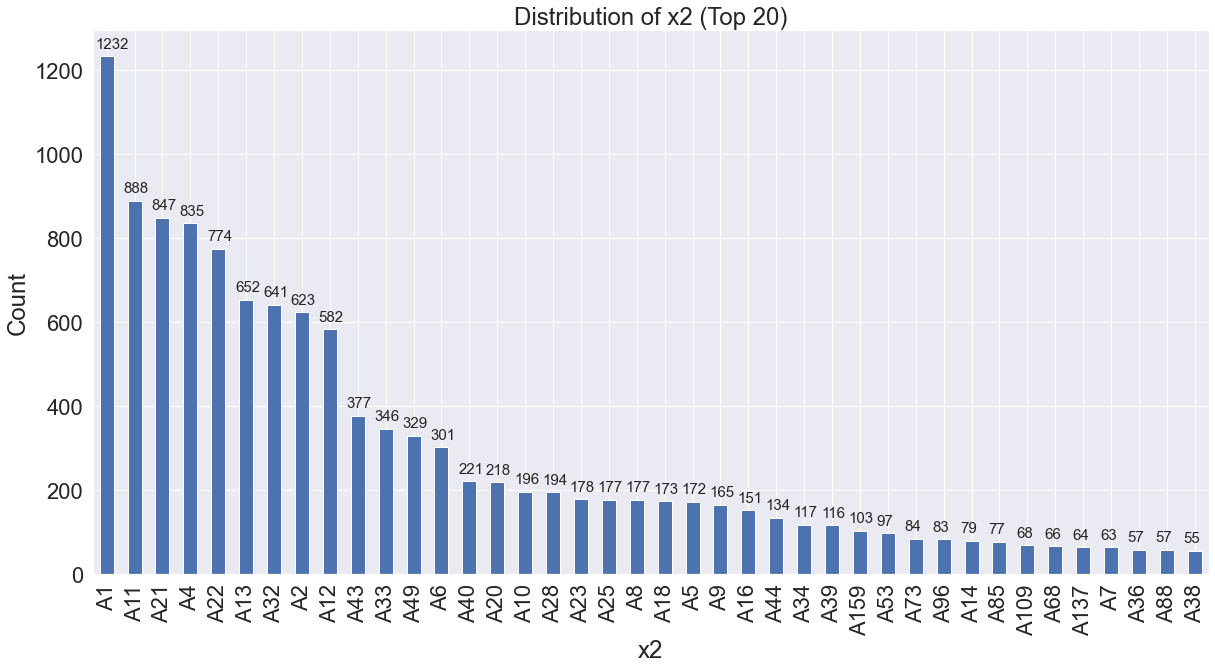

In [11]:
ax = df['x2'].value_counts().head(40).plot.bar()
for i, col in enumerate(ax.patches):
    plt.text(col.get_x()-.15, col.get_height() + 20, df['x2'].value_counts().head(40).tolist()[i], fontsize=15)
plt.title('Distribution of x2 (Top 20)')
plt.xlabel('x2')
plt.ylabel('Count');

The top 20 distribution of x2 shows shows us that the value A1 is present most in x2. This graph does not give us any extra insight on what all these numbers may or may not mean. 

Below is two graphs of the distribution of x0. The left is the distribution by counts and the right is by counts but sorted by index values

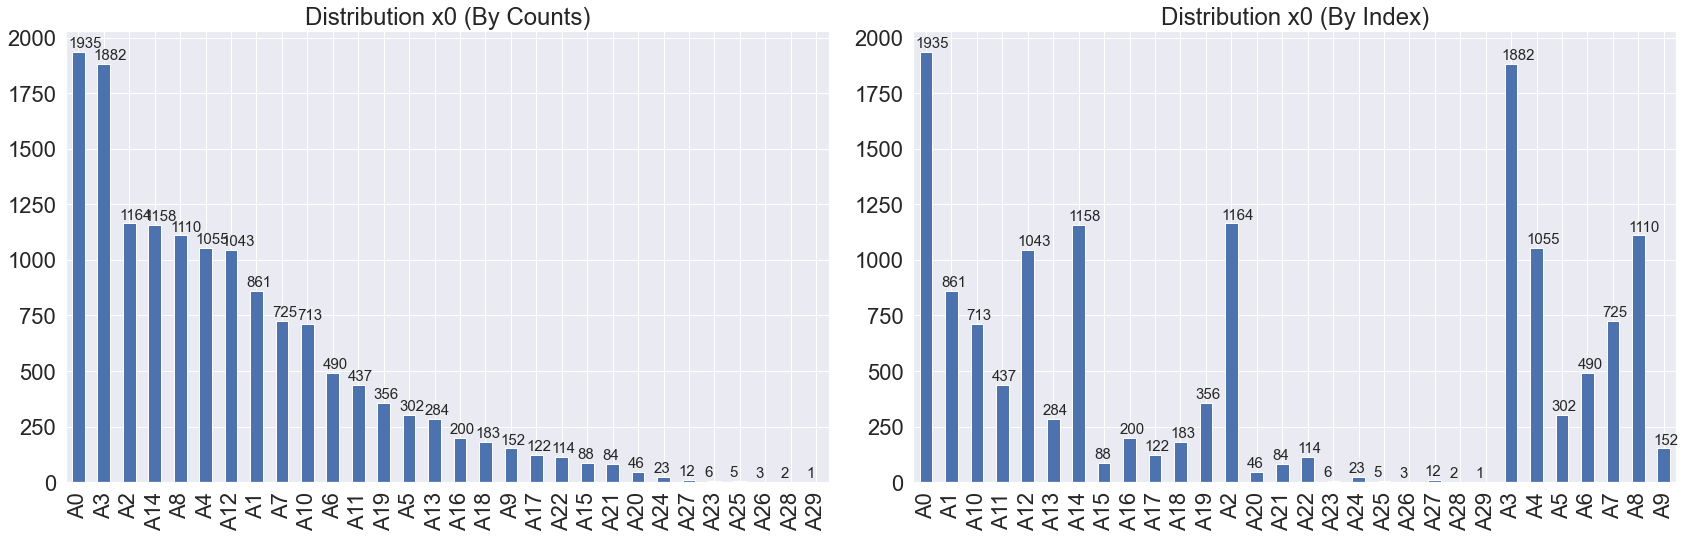

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
# left graph
df['x0'].value_counts().plot.bar(ax=ax1)
ax1.set_title('Distribution x0 (By Counts)')
for i, col in enumerate(ax1.patches):
    ax1.text(col.get_x()-.15, col.get_height() + 20, df['x0'].value_counts().tolist()[i], fontsize=15)
#Right graph
df['x0'].value_counts().sort_index().plot.bar(ax=ax2)
ax2.set_title('Distribution x0 (By Index)')
for i, col in enumerate(ax2.patches):
    ax2.text(col.get_x()-.15, col.get_height() + 20, df['x0'].value_counts().sort_index().tolist()[i], fontsize=15)
plt.tight_layout();

When looking at the distribution sorted by counts, the two most common attributes are A0 and A3. But when looking at the distribution sorted by index, it appears to have no logical order to them.

Also, when looking for any anomalies manually within the categorical data, i noticed that there are rows within <b><em>x2</em></b> that have a value of <em>'unknown'</em>. I will drop those values instead of trying to replacing them.

In [13]:
df['x2'].value_counts().sort_index(ascending=False).head()

unknown    50
A99         8
A98        13
A97         8
A96        83
Name: x2, dtype: int64

Next, i will begin the process of cleaning and processing the data.

## Data preprocessing

Because i do not know what any of the missing features means, i will drop all the missing data

<b> Dropping unknown values </b>

In [14]:
df.dropna(inplace=True)
# Make sure it works
pd.DataFrame(df.isna().mean(), index=df.columns, columns=['Percentage Missing']).join(df.isna().sum().to_frame()).rename(columns={0:'Number of Missing'})

,Percentage Missing,Number of Missing
x0,0.0,0
x1,0.0,0
x2,0.0,0
y,0.0,0
x3,0.0,0
x4,0.0,0


<b>Getting rid of the negative values in column x4</b>

In [15]:
# These are the columns with negative data
df.loc[df['x4'] < 0]

,x0,x1,x2,y,x3,x4
1762,A13,20.0,A4,0.13,0.03,-5.774641
2134,A1,28.0,A8,0.00,0.01,-5.423352
2918,A0,25.0,A137,0.00,0.00,-3.062637
8736,A3,31.0,A22,0.00,0.00,-5.559682
10146,A18,34.0,A11,2.13,0.92,-4.332320
13601,A1,26.0,A43,0.01,0.20,-3.834921


In [16]:
df.drop(df.loc[df['x4'] < 0].index, axis=0, inplace=True)
# Make sure it worked
df.loc[df['x4'] < 0]

,x0,x1,x2,y,x3,x4


<b>Getting rid of the 'unknown' attributes in x2</b>

In [17]:
df.loc[df['x2']=='unknown'].head()

,x0,x1,x2,y,x3,x4
310,A3,30.0,unknown,0.00,0.00,0.04
445,A10,23.0,unknown,0.11,0.03,0.00
496,A17,32.0,unknown,0.22,0.00,0.00
1145,A2,32.0,unknown,0.05,0.00,0.05
1900,A10,22.0,unknown,0.03,0.01,0.01


In [18]:
df.drop(df.loc[df['x2']=='unknown'].index, axis=0, inplace=True)
# Make sure it worked
df.loc[df['x2']=='unknown']

,x0,x1,x2,y,x3,x4


<b> Merging Categories </b>

Because x0 and x2 are both categorical data and there is a lot of individual categories, i will combine categories to limit the amount of unique features there are in within there columns.

In [19]:
# This function will merge all the categories into 1 category that is not in the top n-1 categories with the greatest counts
def merge_small_categories(s, n, new_cat):
    big_cats = np.array(s.value_counts()[:n].index)
    bmask = s.apply(lambda x: x not in big_cats)
    return s.mask(bmask, 'A')

I will merge all the features of x0 into 10 different categories and x3 into 30.

In [20]:
# Convert x0 into 10 categories
df['x0'] = merge_small_categories(df['x0'], 10, 'A')
# Convert x2 into 30 categories
df['x2'] = merge_small_categories(df['x2'], 30, 'A')

Below are graphs of the x0 and x2 with there new categories and all the new counts

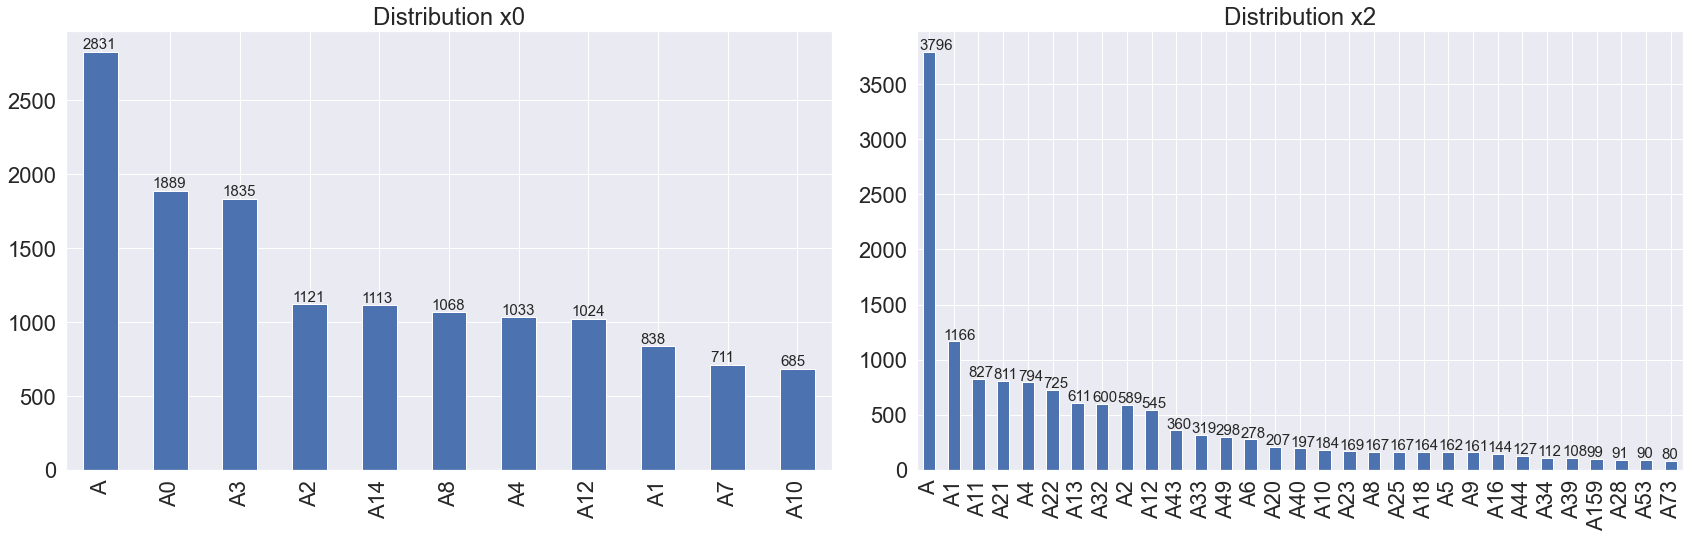

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
# left graph
df['x0'].value_counts().plot.bar(ax=ax1)
ax1.set_title('Distribution x0')
for i, col in enumerate(ax1.patches):
    ax1.text(col.get_x(), col.get_height() + 20, df['x0'].value_counts().tolist()[i], fontsize=15)
#Right graph
df['x2'].value_counts().plot.bar(ax=ax2)
ax2.set_title('Distribution x2')
for i, col in enumerate(ax2.patches):
    ax2.text(col.get_x()-0.15, col.get_height() + 20, df['x2'].value_counts().tolist()[i], fontsize=15)
plt.tight_layout();

<b> Create a new feature </b>

Next, i will create two new features derived from x0 and x2 on whether or not the number after the letters is an even or odd number. Creating this new feature will allow me to use a binary classifying algorithms. 0 will mean an even number and 1 will mean an odd number. I will consider <b> A </b> by itself odd.

In [22]:
# This function takes the last character in the observation and returns 0 or 1 if it is an odd or even number.
def evenOrOdd(df):
    temp = []
    if len(df) == 1:
        return 1
    if int(df[-1]) %2 == 1:
        return 1
    else:
        return 0

# Add two new columns to the data set
df['x0_n'] = df['x0'].apply(evenOrOdd)
df['x2_n'] = df['x2'].apply(evenOrOdd)
df.head()

,x0,x1,x2,y,x3,x4,x0_n,x2_n
0,A0,21.0,A,0.03,0.02,0.00,0,1
1,A1,22.0,A1,2.03,1.56,0.00,1,1
2,A2,31.0,A2,0.66,0.12,0.04,0,0
3,A2,32.0,A,0.01,0.00,0.00,0,1
4,A3,28.0,A4,0.34,0.01,0.00,1,0


Now that we have made these new categories, i will now see how balanced (or imbalanced) they are.

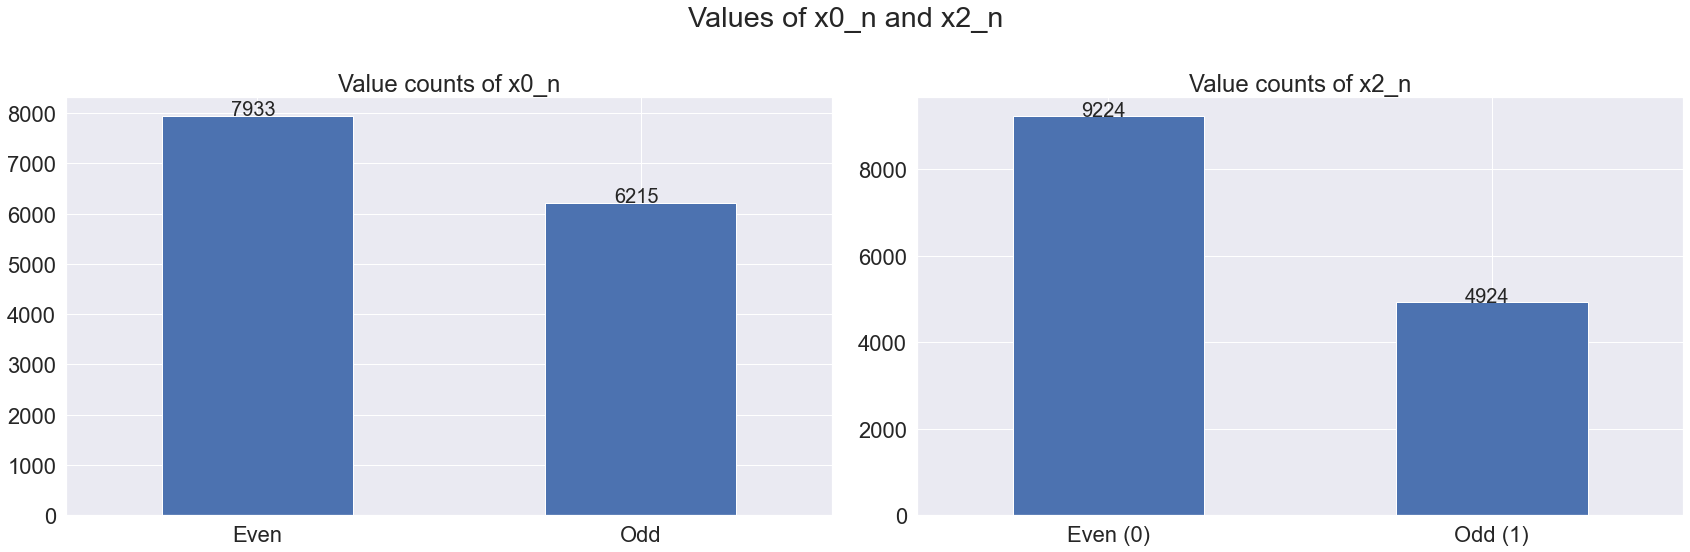

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
# Left graph
df['x0_n'].value_counts().plot.bar(ax=ax1)
ax1.set_title('Value counts of x0_n')
for i, col in enumerate(ax1.patches):
    ax1.text(col.get_x()+0.18, col.get_height() + 20, df['x0_n'].value_counts().tolist()[i], fontsize=20)
plt.sca(ax1)
plt.xticks([0,1],('Even', 'Odd'), rotation=0)
# Right graph
df['x2_n'].value_counts().plot.bar(ax=ax2)
ax2.set_title('Value counts of x2_n')
for i, col in enumerate(ax2.patches):
    ax2.text(col.get_x()+0.18, col.get_height() + 20, df['x2_n'].value_counts().tolist()[i], fontsize=20)
plt.sca(ax2)
plt.xticks([0,1],('Even (0)', 'Odd (1)'), rotation=0)
plt.suptitle('Values of x0_n and x2_n')
plt.tight_layout();

Both columns are slightly imbalanced. These issues will be corrected when we use a categorical algorithm further down in the report. 

Now that i have cleaned and processed the data set to where it is ready for some machine learning, i am going to explore some of the variables within the data set and see if there are any interesting relationships. 

## Data visualization

The first visualizations are a heat map of all the numeric values (excluding the two binary classifiers i created)

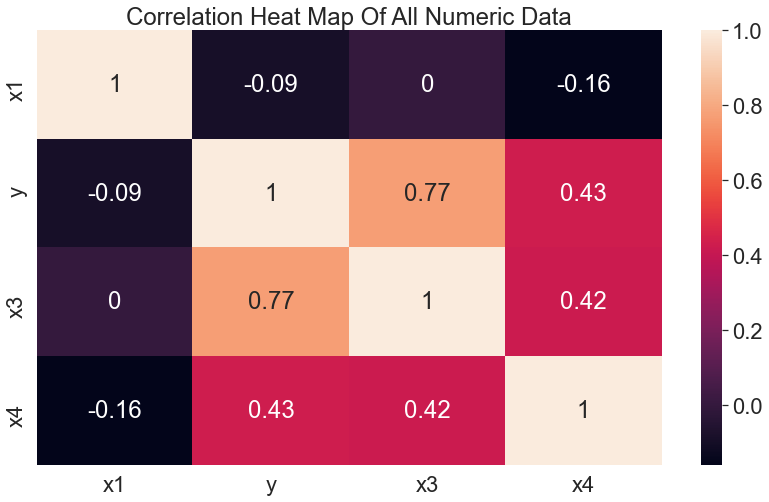

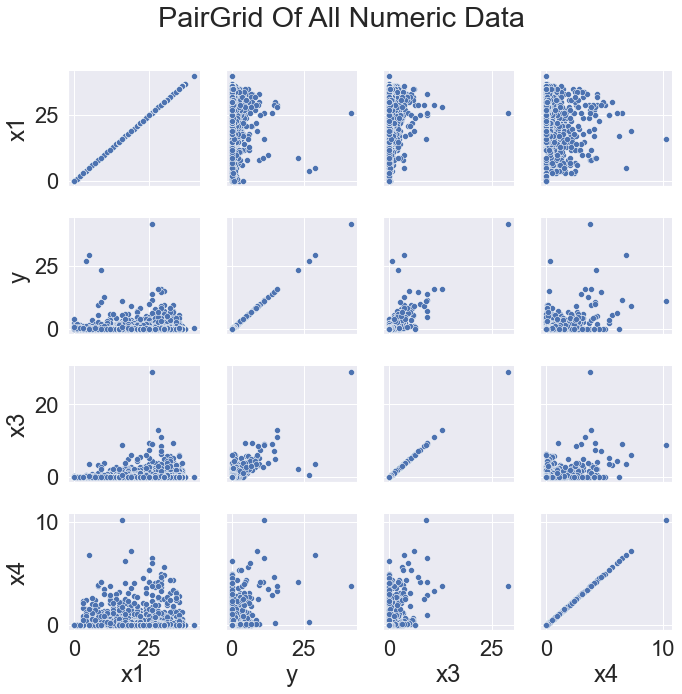

In [24]:
fig, (ax1) = plt.subplots(1, 1, figsize=(14, 8))
corrMatrix = round(df[['x0','x1','x2','y','x3','x4']].corr(),2)
sns.heatmap(corrMatrix, annot=True, ax=ax1);

ax1.set_title('Correlation Heat Map Of All Numeric Data')
g = sns.PairGrid(df[['x0','x1','x2','y','x3','x4']])
g.map(sns.scatterplot)
g.fig.suptitle('PairGrid Of All Numeric Data')

plt.tight_layout()

Some notable things within the correlation heat map is there is a good correlation between the columns x3 and y and also an okay correlation between x4 and y. <br>
There is also a decent correlation between x3 and x4 as well. <br><br>
Some notable things about the pair grid is that y, x3, and x4 all have a lot of crowding around 0. There seems to be a decent relationship between y and x3 where you can kind of make out a linear relationship. 

Below is a graph of where the values of x0 fall in relation with x1 and x4.

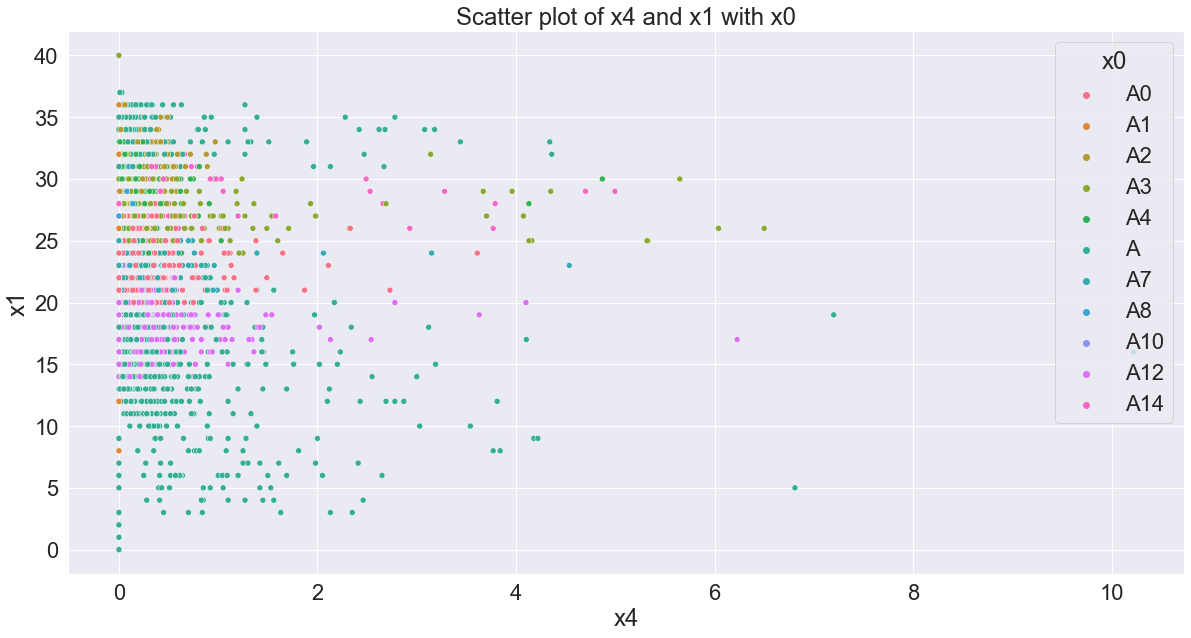

In [25]:
sns.scatterplot(x='x4',y='x1',hue='x0', data=df);
plt.title('Scatter plot of x4 and x1 with x0');

It's hard to distinguish some of the colors from each other but there seems to be a lot of the value A scattered all over. It also looks like the values of A10 are more commonly found in between the values of 15 and 22 within x1. 

Next is another distribution that shows where all the unique values of x0 are distributed within x1. 

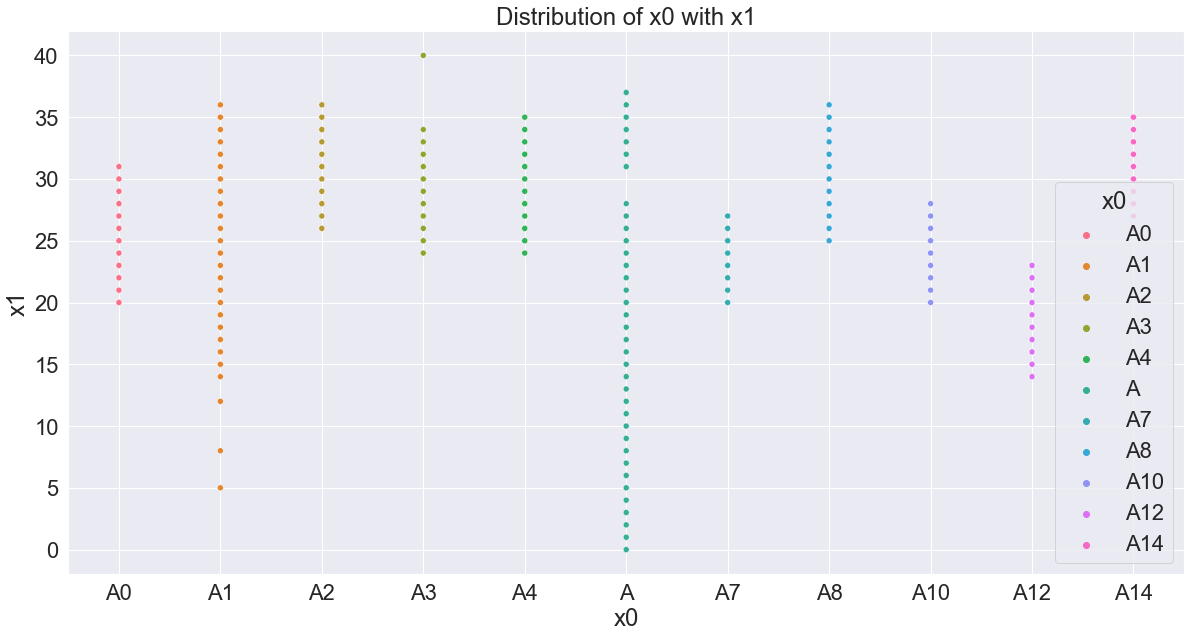

In [26]:
sns.scatterplot(x='x0',y='x1',hue='x0', data=df)
plt.title('Distribution of x0 with x1');

There are some clear distinctions on where exactly the unique values of x0 are distributed in relation to x1. A1 and A both seems to have a high variance but those are both the attributes with the highest number of occurrences. 

Below i show a plot that shows how the data is distributed within x4 and x1. 

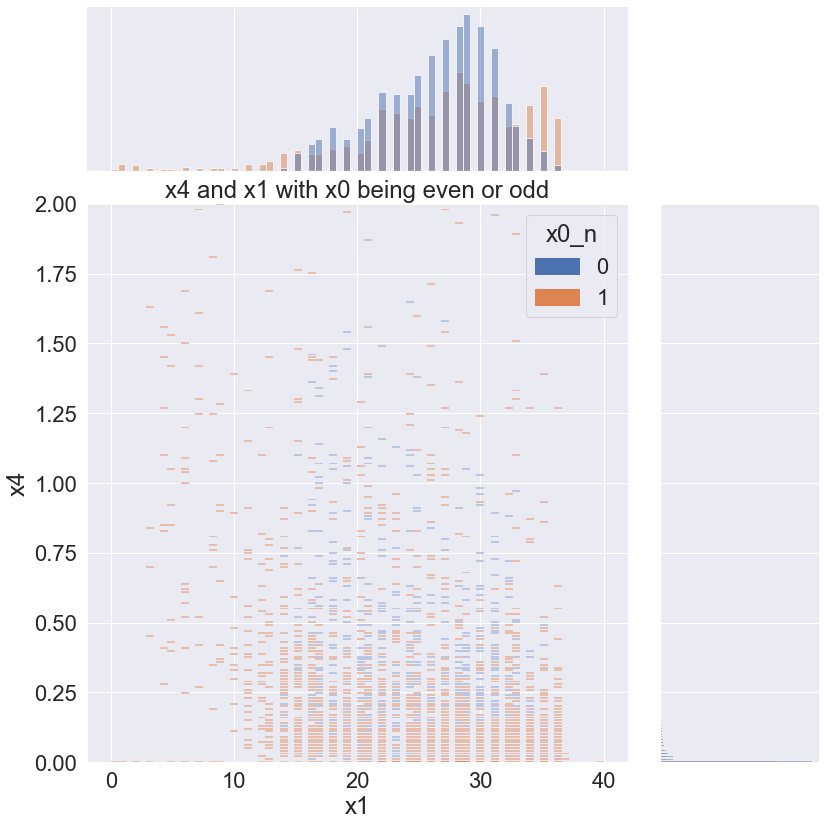

In [27]:
g = sns.jointplot(
    data=df,
    x="x1", y="x4", hue="x0_n",
    kind="hist", ylim=[0,2], height=12, ratio=3
)
plt.title('x4 and x1 with x0 being even or odd');

This graph shows us how most of the data is contained within certain ranges. For instance, most of the data in x1 (with respect to x4) is contained within the values of 10 and 35ish. 

Below i show a density plot showing the density of x1 and x0_n

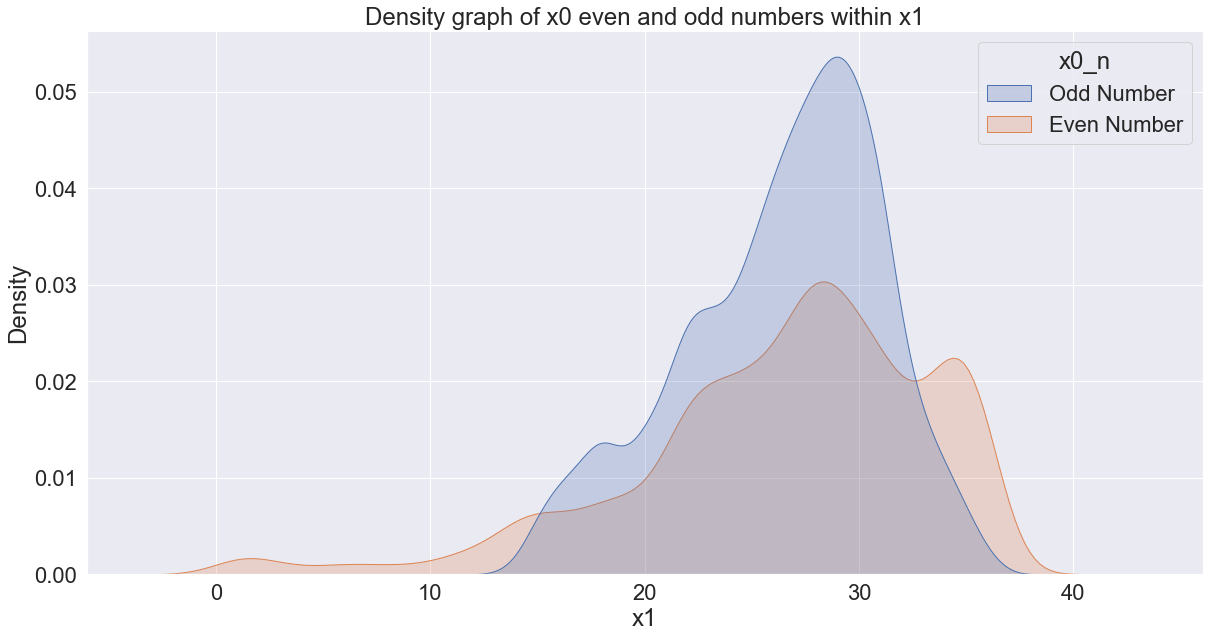

In [28]:
g = sns.kdeplot(df['x1'], shade=True, color="r", hue=df['x0_n'])
plt.title('Density graph of x0 even and odd numbers within x1')
leg = g.axes.get_legend()
new_labels = ['Odd Number', 'Even Number']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

From the graph above, we you can see that most of the odd numbers in x0 are in between the values of 15 and 35 or so where the even numbers are more evenly spread out. 

Now that i have done some visual exploration of different variables within the data set, it is time to use some machine learning. 

## Machine learning

In this section, i will be using a handful of different algorithms. Linear Regression, Polynomial Regression, kNN Classification, and K-Means clustering. 

<h3> Linear Regression </h3>

With y having a good correlation with x3 and a decent correlation with x4, the first algorithm i will attempt will be Linear Regression. I will be attempting to predict y with the features of x3 and x4

In [30]:
target = 'y'
predictors = ['x3','x4']

X = df[predictors].values
y = df[target].values  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions 
y_predict = reg.predict(X_test)

# Intercept and Coefficients
print('Intercept: {:.2f}'.format(reg.intercept_))
print('x3: {:.2f}'.format(reg.coef_[0]))
print('x4: {:.2f}'.format(reg.coef_[1]))
print('Equation of the model: y^hat = {:.2f} + {:.2f}*x3 + {:.2f}*x4'.format(reg.intercept_, reg.coef_[0], reg.coef_[1]))

# The mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_predict)))
print('Root mean Square Error: {:.2f}'.format(np.square(mean_squared_error(y_test, y_predict))))
# The coefficient of determination: 1 is perfect prediction
print('R^2: {:.2f}'.format(r2_score(y_test, y_predict)))

Intercept: 0.06
x3: 1.19
x4: 0.32
Equation of the model: y^hat = 0.06 + 1.19*x3 + 0.32*x4
Mean squared error: 0.41
Root mean Square Error: 0.17
R^2: 0.39


With an R^2 of 39%, this means that the model is not that great because 39% of the variability within the data can be explained by this model. The RMSE of 0.17 is a decent value though.

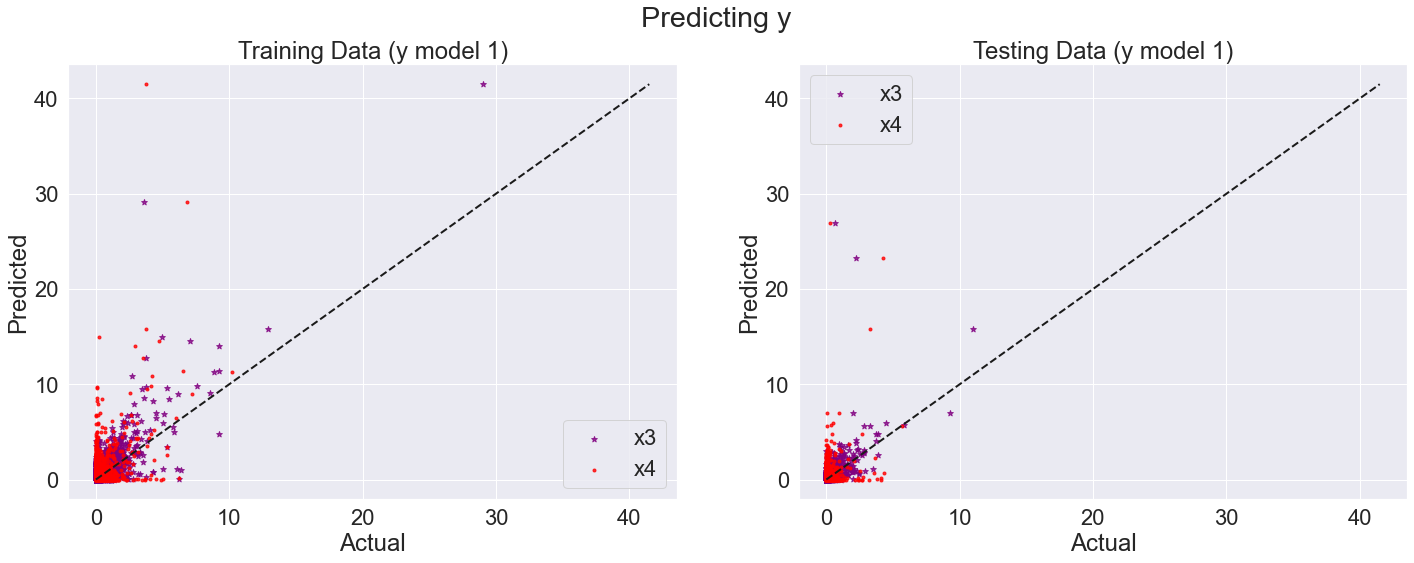

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8), sharex=True)

x3_train = ax1.scatter(X_train[:,0], y_train, color='purple', alpha=0.8, marker="*")
x4_train = ax1.scatter(X_train[:,1], y_train, color='red', alpha=0.8, marker=".")
min_ = min([min(y_train), min(y_train)])
max_ = max([min(y_train), max(y_train)])
ax1.plot([min_, max_], [min_, max_], linestyle='dashed', linewidth=2,color='k')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('Training Data (y model 1)')
ax1.legend((x3_train, x4_train), ('x3', 'x4'));

x3_pred = ax2.scatter(X_test[:,0], y_test, color='purple', alpha=0.8, marker="*")
x4_pred = ax2.scatter(X_test[:,1], y_test, color='red', alpha=0.8, marker=".")
min_ = min([min(y_train), min(y_train)])
max_ = max([min(y_train), max(y_train)])
ax2.plot([min_, max_], [min_, max_], linestyle='dashed', linewidth=2,color='k')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('Testing Data (y model 1)')
ax2.legend((x3_pred, x4_pred), ('x3', 'x4'))

plt.suptitle('Predicting y');

Next, i am going to scale the data and see if that offers any improvement. The type of scaling i am doing is standard scaling where i convert each numeric value into it's z-score. 

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
reg = LinearRegression()
reg.fit(X_train, y_train)

y_predict = reg.predict(X_test)
# Intercept and Coefficients
print('Intercept: {:.2f}'.format(reg.intercept_))
print('x3: {:.2f}'.format(reg.coef_[0]))
print('x4: {:.2f}'.format(reg.coef_[1]))
print('Equation of the model: y^hat = {:.2f} + {:.2f}*x3 + {:.2f}*x4'.format(reg.intercept_, reg.coef_[0], reg.coef_[1]))

# The mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_predict)))
print('Root mean Square Error: {:.2f}'.format(np.square(mean_squared_error(y_test, y_predict))))
# The coefficient of determination: 1 is perfect prediction
print('R^2: {:.2f}'.format(r2_score(y_test, y_predict)))

Intercept: 0.27
x3: 0.64
x4: 0.11
Equation of the model: y^hat = 0.27 + 0.64*x3 + 0.11*x4
Mean squared error: 0.41
Root mean Square Error: 0.17
R^2: 0.39


Compared to our previous model, our metrics haven't changed but we can see the equation of the model has slightly. 

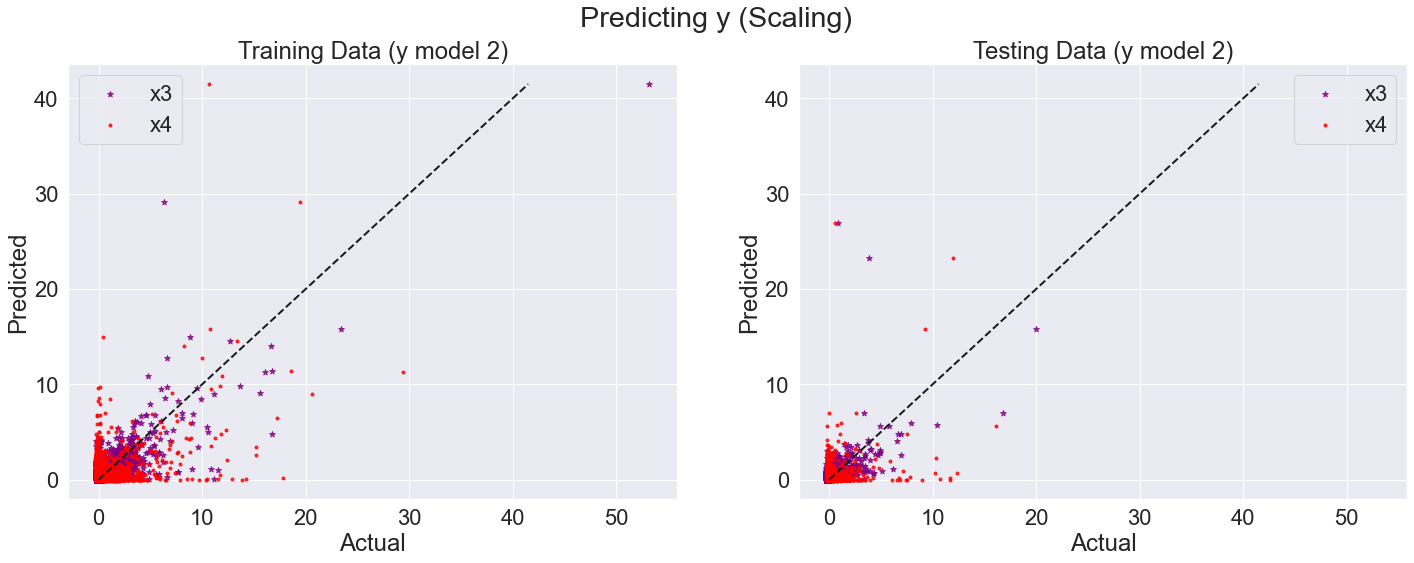

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8), sharex=True)

x3_train = ax1.scatter(X_train[:,0], y_train, color='purple', alpha=0.8, marker="*")
x4_train = ax1.scatter(X_train[:,1], y_train, color='red', alpha=0.8, marker = ".")
min_ = min([min(y_train), min(y_train)])
max_ = max([min(y_train), max(y_train)])
ax1.plot([min_, max_], [min_, max_], linestyle='dashed', linewidth=2,color='k')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('Training Data (y model 2)')
ax1.legend((x3_train, x4_train), ('x3', 'x4'));

x3_pred = ax2.scatter(X_test[:,0], y_test, color='purple', alpha=0.8, marker="*")
x4_pred = ax2.scatter(X_test[:,1], y_test, color='red', alpha=0.8, marker = ".")
min_ = min([min(y_train), min(y_train)])
max_ = max([min(y_train), max(y_train)])
ax2.plot([min_, max_], [min_, max_], linestyle='dashed', linewidth=2,color='k')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('Testing Data (y model 2)')
ax2.legend((x3_pred, x4_pred), ('x3', 'x4'))

plt.suptitle('Predicting y (Scaling)');

Scaling the data offered no improvements to our linear regression model

<h3> Polynomial Regression </h3>

Now that i used linear regression, i will now use polynomial regression to see if we can improve some of the metrics from the linear regression models

In [36]:
r2_list = []
target = 'y'
predictors = ['x3','x4']

X = df[predictors].values
y = df[target].values  

# Loop through the degrees 1 through 5 to see which performs the best
# I will not go higher than 5 because we will run the risk of overfitting the model
for i in range(1,6):
    pf = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = pf.fit_transform(X)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=0)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    y_predict = reg.predict(X_test)

    print('Degree:',i)
    print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_predict)))
    print('Root mean Square Error: {:.2f}'.format(np.square(mean_squared_error(y_test, y_predict))))
    print('R^2: {:.2f}\n'.format(r2_score(y_test, y_predict)))
    r2_list.append(r2_score(y_test, y_predict))

h_degree = (np.where(max(r2_list) == r2_list)[0][0] + 1)
h_r2 = max(r2_list)

print('The highest R^2 score is {:.2f} with degree {}'.format(h_r2, h_degree))

Degree: 1
Mean squared error: 0.41
Root mean Square Error: 0.17
R^2: 0.39

Degree: 2
Mean squared error: 0.41
Root mean Square Error: 0.16
R^2: 0.39

Degree: 3
Mean squared error: 0.39
Root mean Square Error: 0.15
R^2: 0.42

Degree: 4
Mean squared error: 0.42
Root mean Square Error: 0.18
R^2: 0.37

Degree: 5
Mean squared error: 0.41
Root mean Square Error: 0.17
R^2: 0.39

The highest R^2 score is 0.42 with degree 3


Degree 3 offered a slight improvement in R^2 compared to the default of degree 1 (which is what linear regression is). <br><br>
With degree 3 having the highest r^2 score, i will now find the parameters of the model and write the equation for it below.

In [37]:
target = 'y'
predictors = ['x3','x4']

X = df[predictors].values
y = df[target].values  

pf = PolynomialFeatures(degree=3, include_bias=False)
X_poly = pf.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_predict = reg.predict(X_test)

print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_predict)))
print('Root mean Square Error: {:.2f}'.format(np.square(mean_squared_error(y_test, y_predict))))
print('R^2: {:.2f}\n'.format(r2_score(y_test, y_predict)))

temp = []
nums = []
# Add a + infront of positive numbers
nums.append(str(reg.coef_[0].round(2)))
for i in range(1,len(reg.coef_)):
    temp_str = str(reg.coef_[i].round(2))
    if temp_str[0] != '-':
        nums.append('+'+temp_str)
        continue
    nums.append(temp_str)

for i in range(len(reg.coef_)):
    temp.append(nums[i])
    temp.append('*'+str(pf.get_feature_names()[i]))

# Format the list
equation = (str(temp).replace('[','').replace(']','')
            .replace("'","").replace(',','').replace(' x','*x')
            .replace(' ','').replace('+',' + ').replace('-',' - ')
           .replace('x0','x3').replace('x1','x4'))

print('The equation of the polynomial model is: \n y^hat = {} + {}'.format(reg.intercept_.round(2), equation))

Mean squared error: 0.39
Root mean Square Error: 0.15
R^2: 0.42

The equation of the polynomial model is: 
 y^hat = 0.08 + 1.25*x3 + 0.15*x4 - 0.12*x3^2 + 0.6*x3*x4 - 0.25*x4^2 + 0.01*x3^3 - 0.02*x3^2*x4 - 0.07*x3*x4^2 + 0.06*x4^3


Compared to just having a degree of 1 (linear regression), i was able to improve our R^2 score by 3% and bring down the MSE and RMSE. <br><br>
Overall, using the polynomial feature for the linear model did give some improvements with R^2, MSE and RMSE. With only having 2 predictors in our equation, the most amount of parameters for our polynomial model can have is <em>2^3 + 1</em>, which equals <b>9</b>

<h3>kNN Classification</h3>

The next algorithm i will be using will be kNN classification. I will be attempting to predict whether the digits after the letter in x0 is even or odd.

In my first model, i will be using all features in the data set. I will need to encode all the features that are not numeric into numeric values.

In [38]:
df2 = df.copy() # Copy the original data set intead of modifying the original

le_x0 = LabelEncoder()
le_x2 = LabelEncoder()
df2['x0'] = le_x0.fit_transform(df2['x0'])
df2['x2'] = le_x2.fit_transform(df2['x2'])

# Make sure we only have numeric values
df2.head()

,x0,x1,x2,y,x3,x4,x0_n,x2_n
0,1,21.0,0,0.03,0.02,0.00,0,1
1,2,22.0,1,2.03,1.56,0.00,1,1
2,6,31.0,9,0.66,0.12,0.04,0,0
3,6,32.0,0,0.01,0.00,0.00,0,1
4,7,28.0,20,0.34,0.01,0.00,1,0


In [39]:
target = 'x0_n'
predictors = df2.columns[df2.columns != target]

X = df2[predictors].values
y = df2[target].values  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<b> Baseline Accuracy </b>

In [40]:
blind_prediction = np.median(y_train)
bl = (y_test - blind_prediction).mean()
print('The baseline test accuracy is {:.2f}%'.format(bl*100))

The baseline test accuracy is 43.85%


Now that i have a baseline accuracy of 43.85%, i have a good starting point to compare my results to. 

<b> kNN Classifier Model 1 </b>

In [41]:
#Knn Classifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

y_predict = neigh.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predict).round(4)*100))

Accuracy: 98.33%


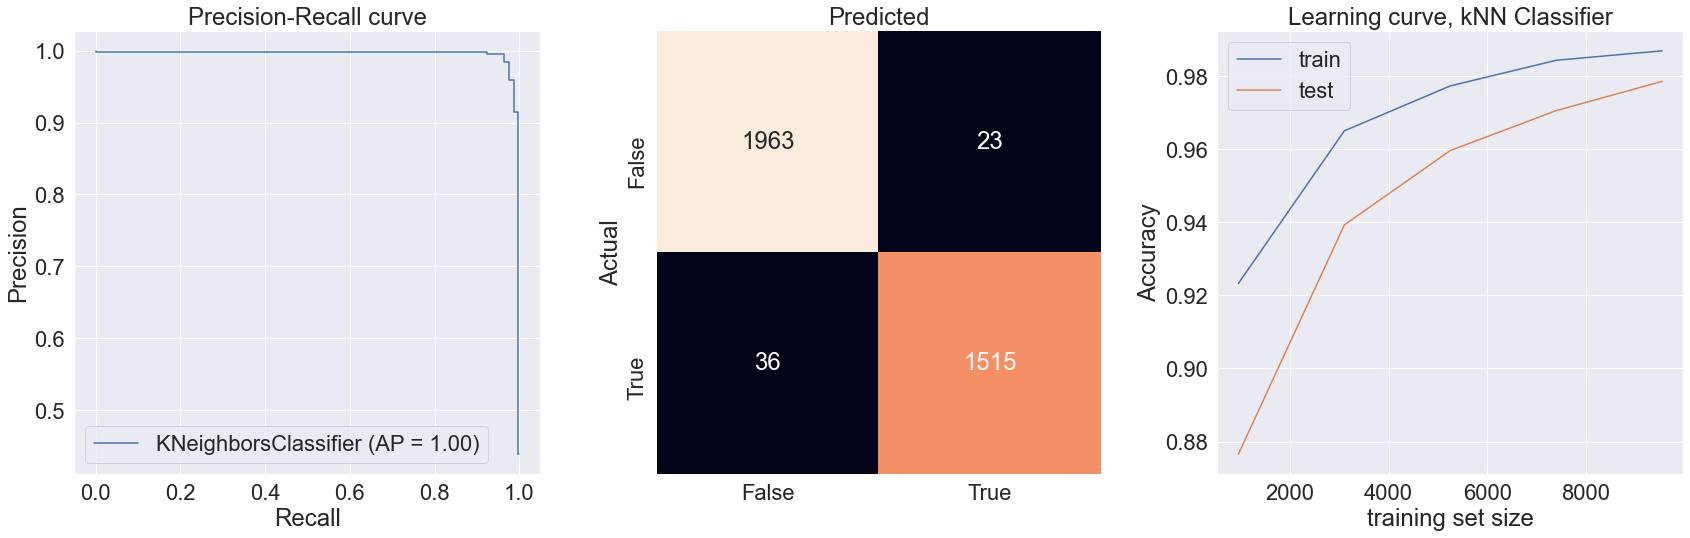

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
disp = plot_precision_recall_curve(neigh, X_test, y_test, ax=ax1)
disp.ax_.set_title('Precision-Recall curve')

mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['False','True'], yticklabels=['False','True'], ax=ax2)
plt.sca(ax2)
plt.title('Predicted')
plt.ylabel('Actual')

train_sizes, train_scores, test_scores = learning_curve(neigh, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
ax3.plot(train_sizes, train_scores_mean, label='train')
ax3.plot(train_sizes, test_scores_mean, label='test')
plt.sca(ax3)
plt.title('Learning curve, kNN Classifier')
plt.xlabel('training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout();

This first kNN model produced a scary amount of accuracy. But from the learning curve, i can see that the testing and training data are both following the same curve which leads me to believe we are training with the target variable. The next model i create, i will use not use the feature that the target variable is derived from to see what kind of accuracy we get.

<b> kNN Classifier Model 2 </b>

In [43]:
target = 'x0_n'
predictors = ['x1','y','x3','x4','x2_n','x2']

X = df2[predictors].values
y = df2[target].values  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

y_predict = neigh.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predict).round(4)*100))

Accuracy: 69.41%


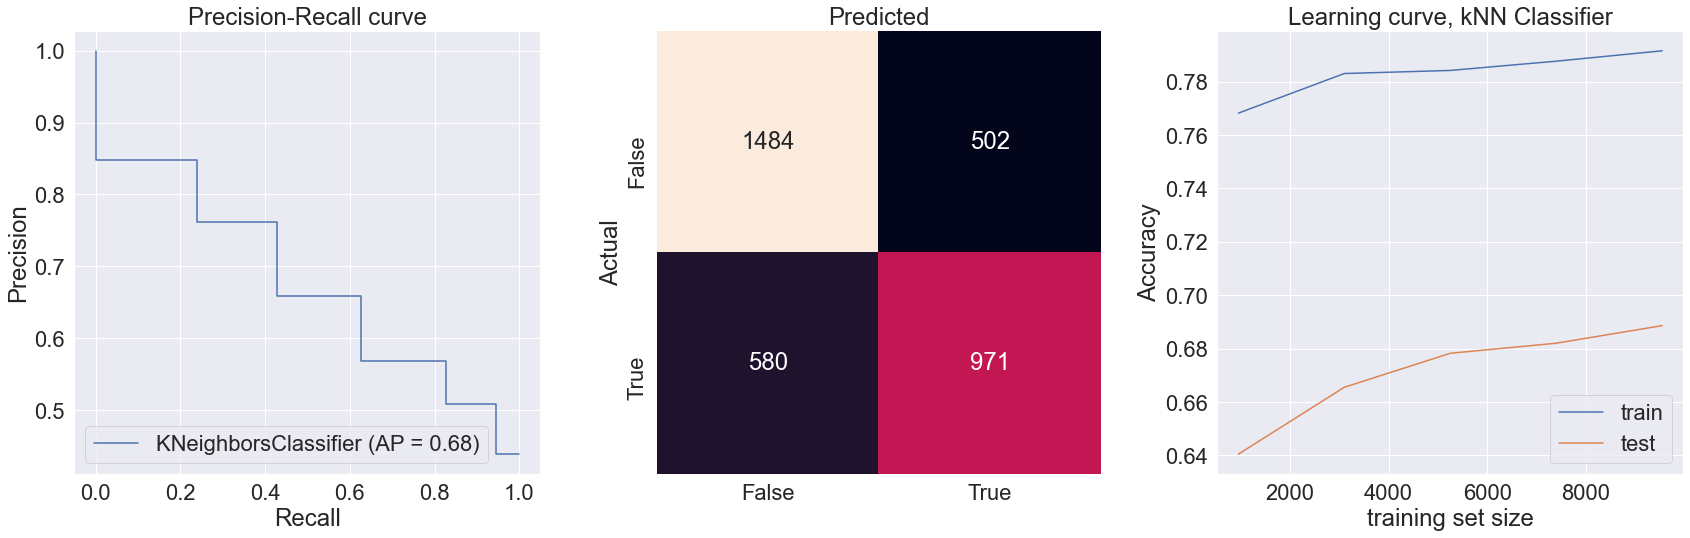

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
disp = plot_precision_recall_curve(neigh, X_test, y_test, ax=ax1)
disp.ax_.set_title('Precision-Recall curve')

mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['False','True'], yticklabels=['False','True'], ax=ax2)
plt.sca(ax2)
plt.title('Predicted')
plt.ylabel('Actual')

train_sizes, train_scores, test_scores = learning_curve(neigh, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
ax3.plot(train_sizes, train_scores_mean, label='train')
ax3.plot(train_sizes, test_scores_mean, label='test')
plt.sca(ax3)
plt.title('Learning curve, kNN Classifier')
plt.xlabel('training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout();

An accuracy of 69% is not that great but also i have done no tuning and optimizing. It is however better than our baseline test accuracy. The precision-recall curve also is not that great either with only have an average score of 68%. The learning curve now shows that there is high variance among the data. This is usually a symptom of overfitting. <br> 

<b> kNN Classifier Model 2 </b> <br>
<em>Grid Search, Balancing Training Data (Undersampling the Majority Class), and Scaling </em>

Next, i will attempt to improve my kNN model by doing a grid search for the best features, by undersampling the majority class, and scaling the training data.

In [49]:
target = 'x0_n'
predictors = ['x1','y','x3','x4','x2_n','x2']

X = df2[predictors]
y = df2[target]

# Split the data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Undersample the majority class

# Join the training sets together again
temp_df = X_train_temp.join(y_train_temp)
# Get all the rows where x0_n is 1
minority_rows = temp_df[temp_df['x0_n'] == 1]
# Get the count of those rows
minority_count = minority_rows.shape[0]
# Get a sample of the observations in the dataset that indicate they are not even
majority_rows = temp_df[temp_df['x0_n'] == 0].sample(minority_count, replace=False, random_state=0)
# Join the two sets together
df_balanced = pd.concat([majority_rows, minority_rows])
# Shuffle the observations
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
# Remove the response from the balanced dataset
X_train = df_balanced[df_balanced.columns[df_balanced.columns != target]]
y_train = df_balanced[target]

# Scale the data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [51]:
# Create the parameters that will be used for the gridsearch
params = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29], # Use odd numbers to prevent a tie
    'weights': ['uniform', 'distance'],
    'p': [1, 2], # 1 = manhattan, 2 = euclidean
    'metric' : ['euclidean','manhattan']
}

grid_search_cv = GridSearchCV(KNeighborsClassifier(), params, cv=10, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 27, 'p': 1, 'weights': 'distance'}

Now that we have our best parameters, I am going to apply them to our next kNN model.

In [52]:
neigh = KNeighborsClassifier(metric='manhattan', n_neighbors=27, p=1, weights ='distance')
neigh.fit(X_train, y_train)

y_predict = neigh.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predict).round(4)*100))

Accuracy: 70.23%


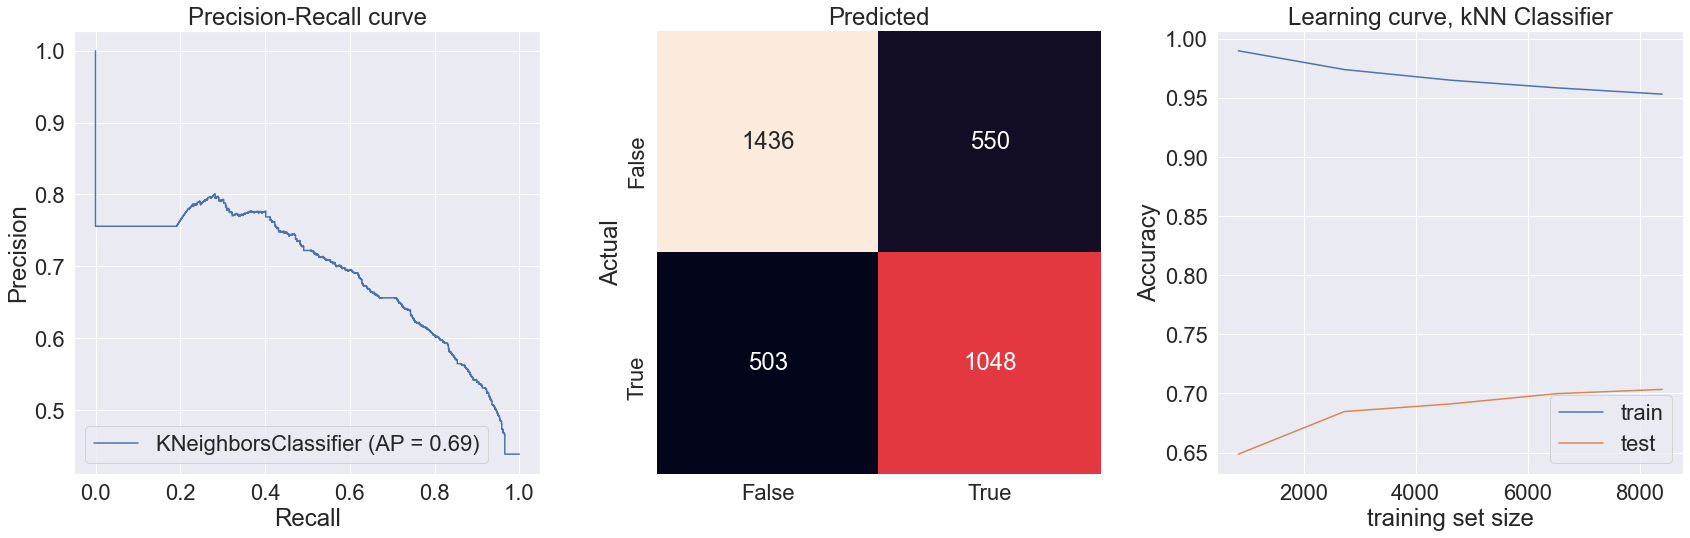

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
disp = plot_precision_recall_curve(neigh, X_test, y_test, ax=ax1)
disp.ax_.set_title('Precision-Recall curve')

mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['False','True'], yticklabels=['False','True'], ax=ax2)
plt.sca(ax2)
plt.title('Predicted')
plt.ylabel('Actual')

train_sizes, train_scores, test_scores = learning_curve(neigh, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
ax3.plot(train_sizes, train_scores_mean, label='train')
ax3.plot(train_sizes, test_scores_mean, label='test')
plt.sca(ax3)
plt.title('Learning curve, kNN Classifier')
plt.xlabel('training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout();

After doing a grid search, we were only able to improve our models accuracy by over half a percent. The learning curve still shows there being high variance in the model. 

<b> kNN Classifier Model 3 </b> <br>
<em>Grid Search, Balancing Training Data (SMOTE), and Scaling </em>

For my next model, i will use SMOTE (Synthetic Minority Over-Sampling Technique) as a balancing technique along with grid searching and scaling the data.

In [58]:
target = 'x0_n'
predictors = ['x1','y','x3','x4','x2_n','x2']

X = df2[predictors]
y = df2[target]

# Split the data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Use SMOTE
smt = SMOTE(n_jobs=-1)
X_train, y_train = smt.fit_sample(X_train_temp, y_train_temp)

# Scale the data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Do gridsearch
params = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23,25,27,29], # Use odd numbers to prevent a tie
    'weights': ['uniform', 'distance'],
    'p': [1, 2], # 1 = manhattan, 2 = euclidean
    'metric' : ['euclidean','manhattan']
}

grid_search_cv = GridSearchCV(KNeighborsClassifier(), params, cv=10, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'p': 1, 'weights': 'distance'}

In [59]:
neigh = KNeighborsClassifier(metric='manhattan', n_neighbors=19, p=1, weights ='distance')
neigh.fit(X_train, y_train)

y_predict = neigh.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_predict).round(4)*100))

Accuracy: 70.34%


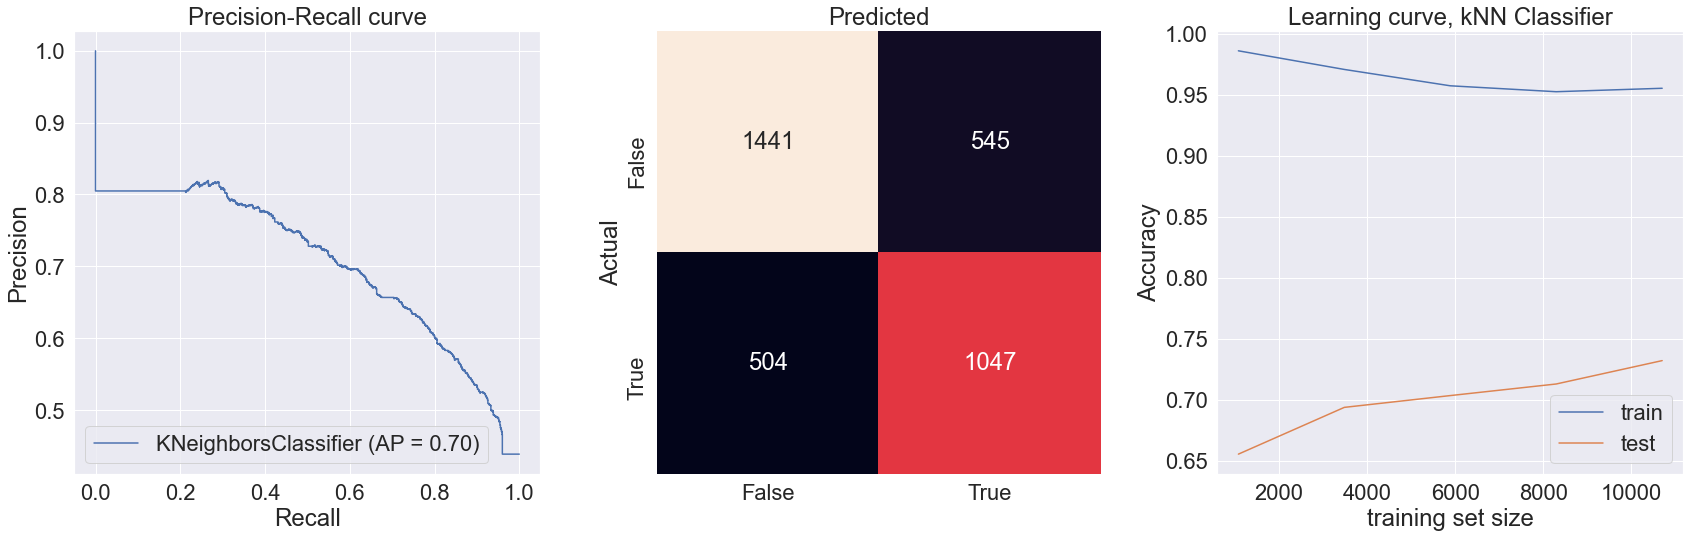

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
disp = plot_precision_recall_curve(neigh, X_test, y_test, ax=ax1)
disp.ax_.set_title('Precision-Recall curve')

mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['False','True'], yticklabels=['False','True'], ax=ax2)
plt.sca(ax2)
plt.title('Predicted')
plt.ylabel('Actual')

train_sizes, train_scores, test_scores = learning_curve(neigh, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
ax3.plot(train_sizes, train_scores_mean, label='train')
ax3.plot(train_sizes, test_scores_mean, label='test')
plt.sca(ax3)
plt.title('Learning curve, kNN Classifier')
plt.xlabel('training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout();

When using SMOTE, i was able to increase our accuracy by only around 1% to above 70%. The average precision and recall score did go up by 2% as well. The Learning curve still shows high variance within the model

<b> kNN Classifier Model 4 </b> <br>
<em>Grid Search, Balancing Training Data (SMOTE), Adjusting Threshold, and Scaling </em>

The last method for improving accuracy with kNN classifier will be adjusting the threshold and to compute the highest accuracy score. I will be using SMOTE as the balancing technique because it offered a slightly better improvement in accuracy compared to undersampling the majority class. I also am using the same best parameters determined by the grid search.

In [61]:
target = 'x0_n'
predictors = ['x1','y','x3','x4','x2_n','x2']

# List to store all the accuracy scores
acc_scores = []

X = df2[predictors].astype(float)
y = df2[target]

# Split the data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Use SMOTE
smt = SMOTE(n_jobs=-1)
X_train, y_train = smt.fit_sample(X_train_temp, y_train_temp)

# Scale the data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

neigh = KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1, weights ='distance')
neigh.fit(X_train, y_train)

# Loop through the thresholds from 0 to 99
for i in range(0,100):
    threshold = i/100
    y_prob = neigh.predict_proba(X_test)[:,1]
    y_predict = (y_prob > threshold).astype(int)
    acc_scores.append(accuracy_score(y_test, y_predict).round(4))
    
thresh = np.where(max(acc_scores) == acc_scores)[0][0]
h_acc = max(acc_scores)

print('The highest accuracy is {:.2f}% with threshold {}'.format(h_acc*100, thresh))

The highest accuracy is 70.77% with threshold 47


Now that i have the optimal threshold for accuracy, i will graph the metrics again.

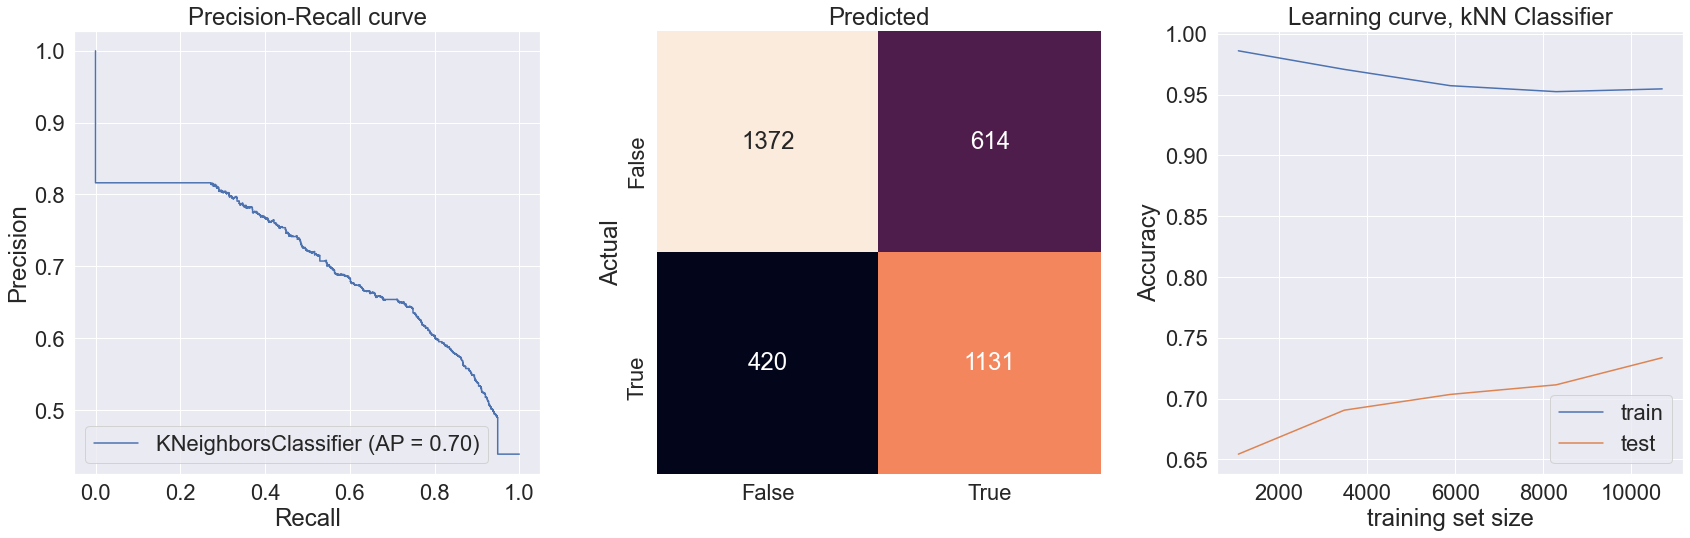

In [62]:
y_predict = (y_prob > thresh/100).astype(int)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
disp = plot_precision_recall_curve(neigh, X_test, y_test, ax=ax1)
disp.ax_.set_title('Precision-Recall curve')

mat = confusion_matrix(y_test, y_predict) # Confusion Matrix
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=['False','True'], yticklabels=['False','True'], ax=ax2)
plt.sca(ax2)
plt.title('Predicted')
plt.ylabel('Actual')

train_sizes, train_scores, test_scores = learning_curve(neigh, X_train, y_train, cv=10, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
ax3.plot(train_sizes, train_scores_mean, label='train')
ax3.plot(train_sizes, test_scores_mean, label='test')
plt.sca(ax3)
plt.title('Learning curve, kNN Classifier')
plt.xlabel('training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout();

Even after adjusting the thresholds, i am still not able to bring accuracy higher than the low 70's. The learning curve also still shows very high variance. 

Overall, the best kNN model was the last one when i used grid search, balancing training data (SMOTE), adjusting threshold (threshold of 47), and scaling. This model had the highest accuracy of the three kNN models. I used accuracy as my main metric for judging which is the best model because i do not know what the variables means so i do now know if having a higher precision/recall is more important than having higher accuracy. I easily could have used precision and recall as my main metrics for performance but chose to use accuracy instead for this given project. 

<h3> k-means clustering </h3>

For k-means cluster, i will be using the same data set from kNN.

To determine what the optimal k value will be in kmeans, we will implement the elbow technique

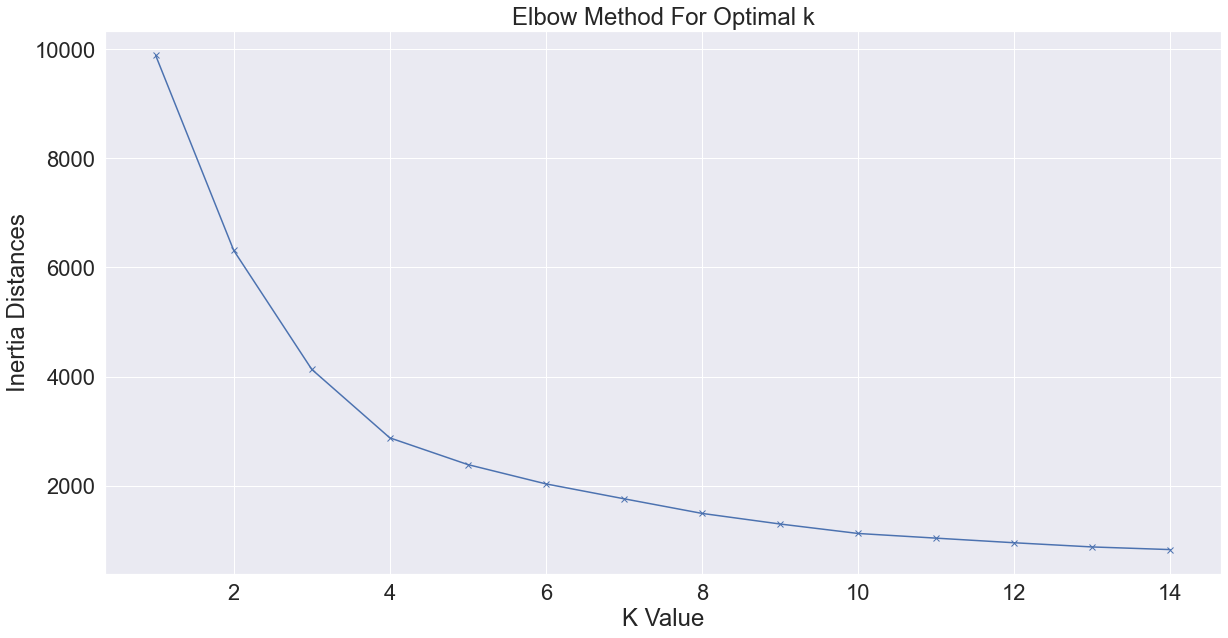

In [63]:
# Scale the data
min_max_scaler = MinMaxScaler()
cluster_X = min_max_scaler.fit_transform(df2)

# Loop through k_values of 1 to 14 and add the inertia value to a list
Inertia_list = []
K_values = range(1,15)
for k in K_values:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_X)
    Inertia_list.append(km.inertia_)
    
# Plot the inertia
plt.plot(K_values, Inertia_list, 'bx-')
plt.xlabel('K Value')
plt.ylabel('Inertia Distances')
plt.title('Elbow Method For Optimal k');

From looking at the graph, it looks like 4 is the 'elbow', so we will use 4 as our number of clusters

Next, i will be doing cluster analysis using the features <b> y </b> and <b> x4 </b> because those were two of the features i used in the linear regression

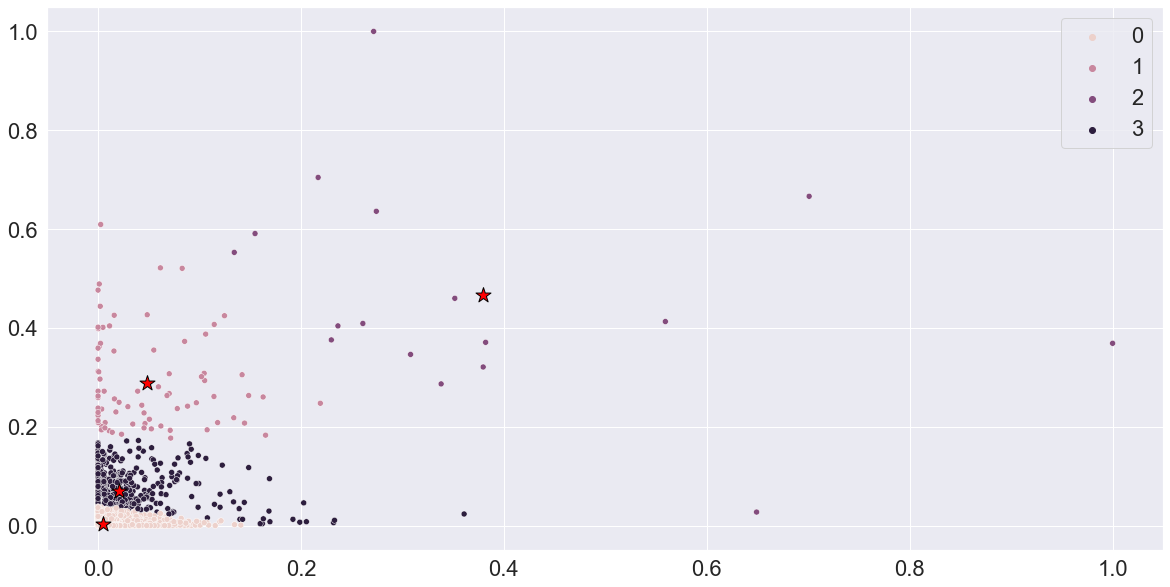

In [64]:
# Create a numpy array of y and x4
cluster_X = df[['y','x4']].values

# Scale the data
min_max_scaler = MinMaxScaler()
cluster_X = min_max_scaler.fit_transform(cluster_X)

# Create the kmeans
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels_pred = kmeans.fit_predict(cluster_X) # Make predictions

# Graph the results
sns.scatterplot(x=cluster_X[:,0],y=cluster_X[:,1], hue=labels_pred)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
);

From the graph above, we can see the 4 clusters kmeans has chosen with there centers. 

## Conclusions

In this project, i was given seemly random data and features and was able to identify certain relationships within the data set. I identified the outliers and removed all the negative ones. I identified and removed all the missing data, and i found some bad features and removed them as well. Afterwards i presented visualization that showed some of the relationships between other variables that i ended up using as guides for deciding which machine learning algorithms to use. I then used Linear Regression to predict the value of <b>y</b> with the predictors x3 and x4. After, i used the polynomial feature to increase our R^2 value with the linear regression model by a couple percentages. I also displayed the equations for both the linear regression model and polynomial regression model. The next model i used was a kNN classifier where i predicted whether the column x0 has an even or odd number after the character in front. I found the baseline accuracy of the kNN model and was able to improve that accuracy by over 30% by using a combination of gridsearch, scaling, adjusting the probability threshold, and balancing the training data. Finally, i did a KMeans cluster analysis of the values y and x4, found the optimal k value of 4, and displayed the clusters along with where the algorithm placed it's centers. <br> <br>

Overall, this assignment was challenging because i was not given many features to work with so i had to create my own from patterns i thought of. I am surprised that i was actually able with 70ish% accuracy show predict whether the column x0 has an even or odd number after the first character. 